<p align="center">
    <h1 align="center">Machine Learning and Statistics Tasks 2020</h1>
    <h1 align="center"> Task 4: Iris data set K-means clustering</h1>
    <h2 align="center"> Author: Ezekiel Onaloye</h2>
    <h2 align="center"> Created: December 2020 </h2> 
</p>

![KMeans_Clustering](img/KMeans_Clustering.jpg)

### Task 4

For this task I will be covering one of the most common clustering methods known as K-means algorithm by applying to the famous Iris data set which I enjoying reseacrhing in first semester as a project for Dr Ian. I did extra research for k-means algorithm to my understanding and knowledge of Iris data general scope having covered it in depth in first sememster see link here.


The scikit-learn library contains built-in datasets in its datasets module which I will be using for this task and have the dataset as a csv from 1st semester (Programming and Scripting). 

### Introduction K-means Algorithm

Clustering is the most popular unsupervised learning algorithm; it groups data points into clusters based on their similarity. K-Means is the most popular clustering algorithm. It uses an iterative technique to group unlabeled data into K clusters based on cluster centers (centroids).

Based on research completed for task 4 completion I can simply say clustering refers to grouping of observations which is an unsupervised machine learning technique.

In the K Means clustering predictions are dependent and the use of scatter plot or the data table for taking the estimated number of the centroids or the cluster centers (k) is very important [2].

With k-means, you have to supply the algorithm with how many clusters you want beforehand. That can be annoying since we may not know how many clusters exist in the data. What we can do is run k-means several times with different numbers of clusters and then see which number of clusters best fits the data[3].

### Introduction Iris Data 

Iris flower data set was introduced by the British statistician and biologist Ronald Fisher in 1936 as an example of linear discriminant analysis. Iris data set file contain a multivariate dataset that consist of 50 samples from each of three species of Iris flowers (Iris Setosa, Iris Virginica and Irish Versicolor). Each sample has 4 features, the length and the width of Sepal and Petal in centimeters. Dataset is stored in CSV format (Comma separated values) format and also through scikit-learn library. The dataset has 5 columns, the first 4 columns contains the values of the features while the last column represents the class of the samples.

### Importing necessary libraries 

In [1]:
# Adapted from https://www.datasciencelearner.com/k-means-clustering-in-python-label-dataset/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale # for scaling the data
import sklearn.metrics as sm # for evaluating the model
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

%matplotlib inline 
rcParams["figure.figsize"] = 12,6

### Descriptive Statistics

### Description

In [2]:
# #Load the housing data from the scikit-learn library
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns = ["sepal_length","sepal_width","petal_length","petal_width"]
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#checking values in iris dataset 
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
print(iris.frame)

None


In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
# description of all the features - in feature_names 
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Summary

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Iris dataset visualisation

In [11]:
# Load the Data
df = pd.read_csv('iris.csv')

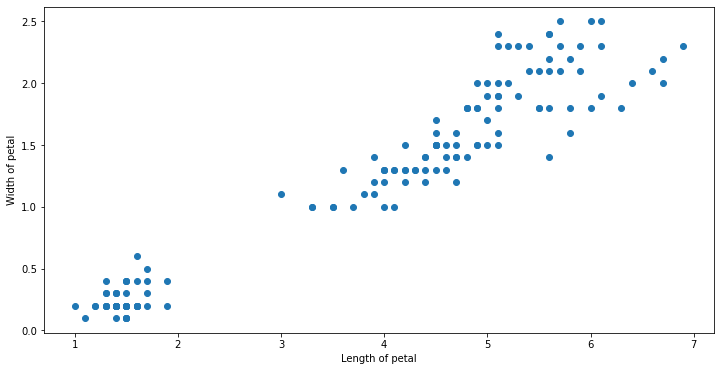

In [12]:
# Plot sepal_length and sepal_width
plt.scatter(df['petal-length'], df['petal-width'])

plt.xlabel('Length of petal')
plt.ylabel('Width of petal')
plt.show()

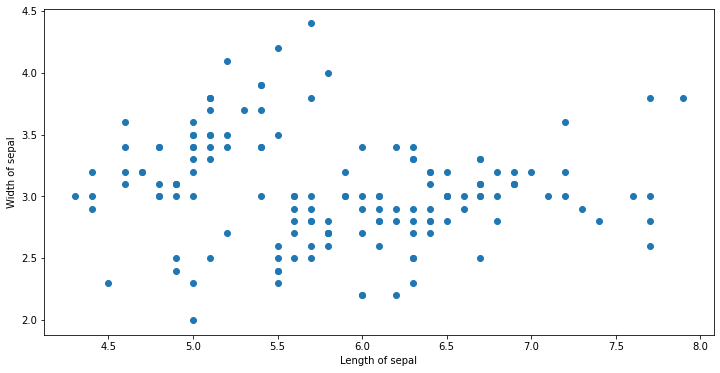

In [13]:
import seaborn as sns
sns.set

# Plot sepal_length and sepal_width
plt.scatter(df['sepal-length'], df['sepal-width'])

plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal')
plt.show()

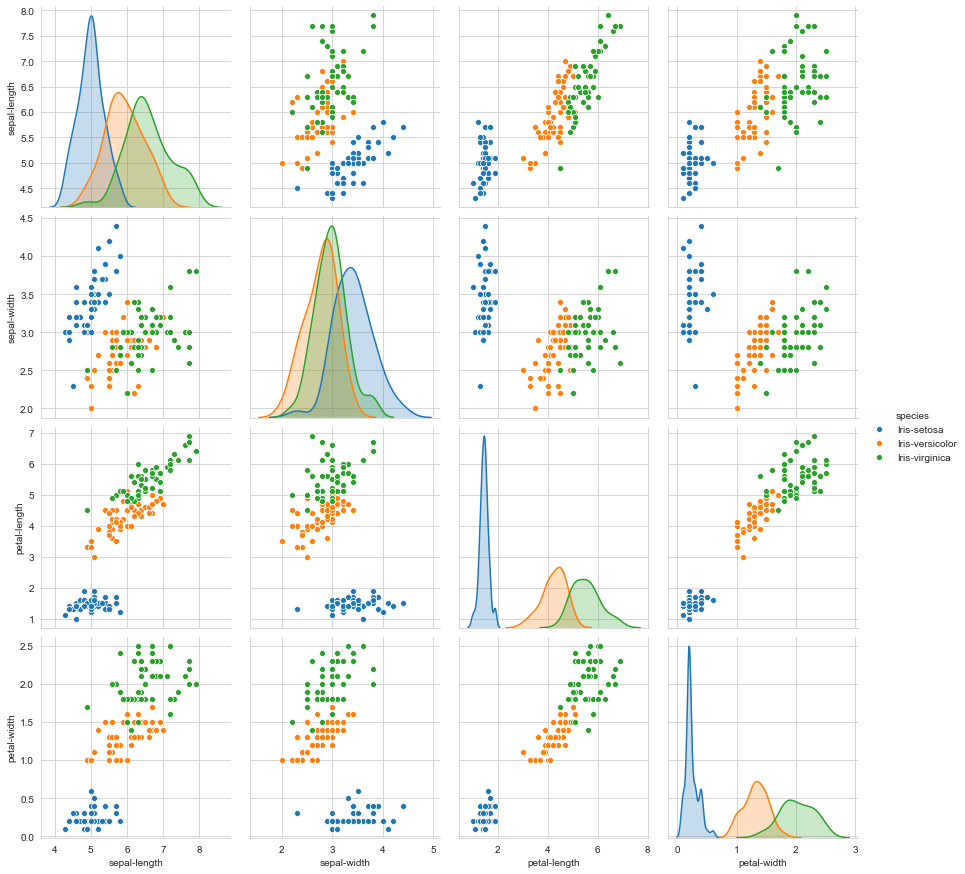

In [14]:
# Load the Data
df = pd.read_csv('iris.csv')
sns.set_style("whitegrid")
sns.pairplot(df,hue='species',height=3);
plt.show()

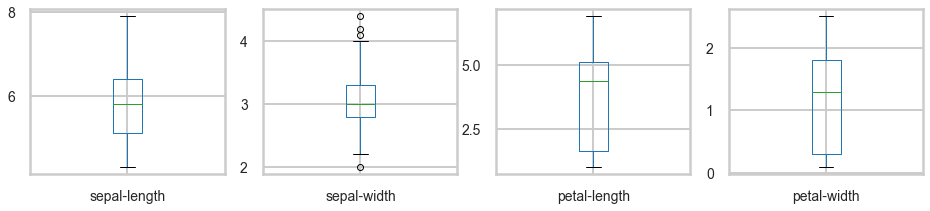

In [15]:
#box whisker plots

import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=14, figsize =(16,14))
plt.show()

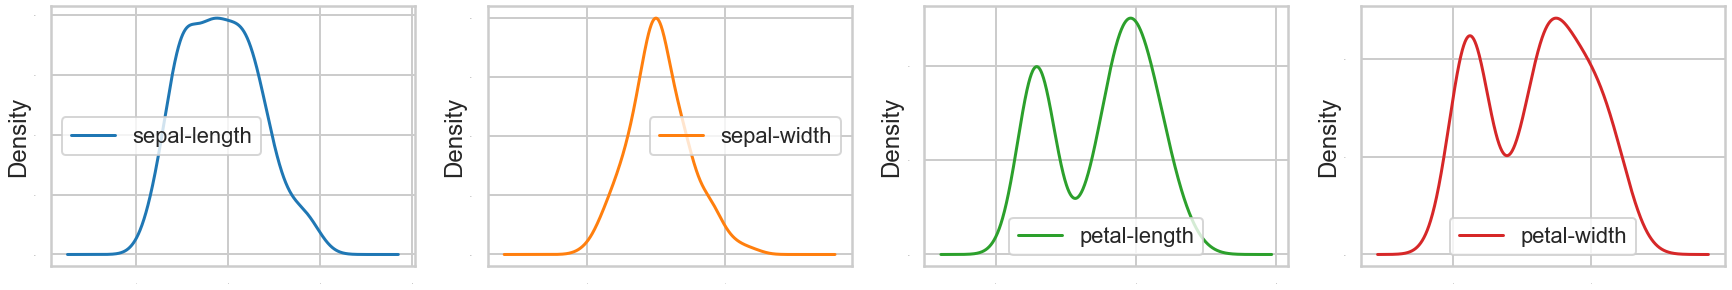

In [16]:
# Modality 
# boston dataset features and target density plots
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=1, figsize=(30,22))
plt.show()

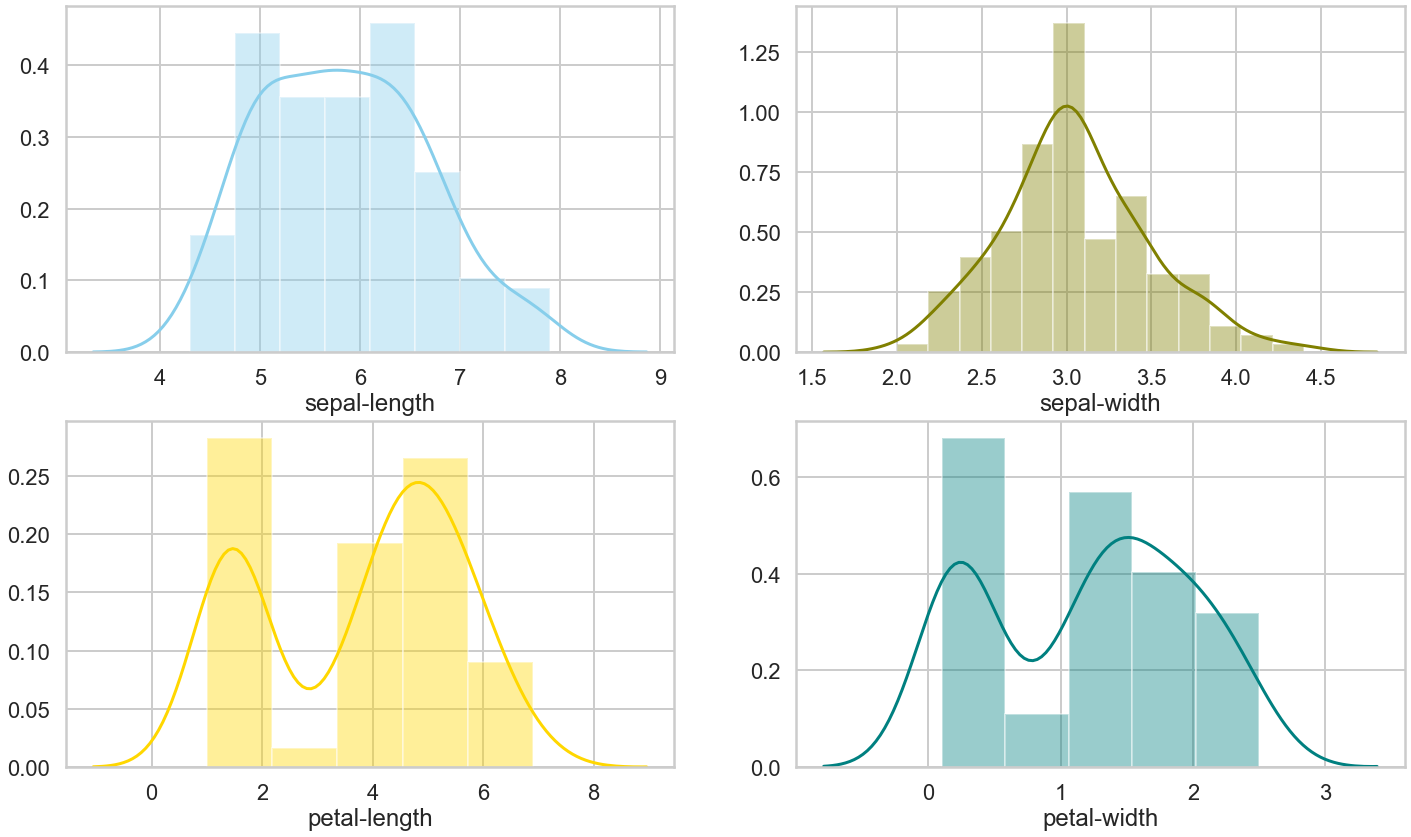

In [18]:
f, axes = plt.subplots(2, 2, figsize=(24,14), sharex=False)

sns.distplot(df["sepal-length"], color="skyblue", ax=axes[0,0])
sns.distplot(df["sepal-width"] , color="olive", ax=axes[0, 1])
sns.distplot(df["petal-length"] , color="gold", ax=axes[1, 0])
sns.distplot(df["petal-width"] , color="teal", ax=axes[1, 1])

### K-means algorithm

1) Partition the data into K randomly placed clusters.

2) Assign each point to its nearest cluster. The distance from each data point to each cluster centre is calculated. 

3) If a data point is closest to its own cluster centre, the data point stays in that cluster; if not, it is assigned to the closest cluster.

4) Repeat these steps until no data point moves from one cluster to another. 

[3]

### Applying K-means clustering to the Iris data set

In [ ]:
sepal_length","sepal_width","petal_length","petal_width

In [ ]:
# Extra Research: https://www.klmanalyticshub.com/segmenting-the-iris-flower-species-k-means-clustering-model/
# Extra Research: https://www.kaggle.com/khotijahs1/k-means-clustering-of-iris-dataset
# Extra Research: https://www.youtube.com/results?search_query=k-means+clustering+python+sklearn

### References

1. [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

2. [Iris flower data set project](https://github.com/ezekielonaloye-gmit/project)

3. [K Means Clustering in Python : Label the Unlabeled Data](https://www.datasciencelearner.com/k-means-clustering-in-python-label-dataset/)

4. [Cluster Analysis: A Brief Overview](https://www.fusionsport.com/blog/cluster-analysis-a-brief-overview/)

5. [Seaborn visualization on iris data set](https://www.kaggle.com/noelano/seaborn-visualization-on-iris-data-set)

6. [K- Means Clustering Algorithm](https://www.educba.com/k-means-clustering-algorithm/)

7. [Segmenting the Iris Flower Species (K-Means Clustering Model)](https://www.klmanalyticshub.com/segmenting-the-iris-flower-species-k-means-clustering-model/)